In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('/Users/johnhendricks/DATA SCIENCE PROJECT/ECON_FREEDOM_DATA.csv')

In [3]:
data = df.dropna()

<AxesSubplot:>

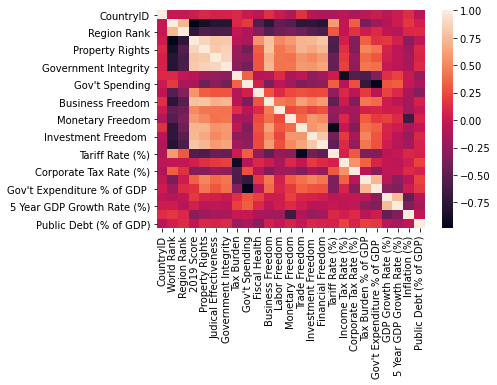

In [4]:
sns.heatmap(data.corr())

In [52]:
country_large = data.nlargest(15,['2019 Score'])
country_small = data.nsmallest(15, ['2019 Score'])
region_small = country_small.groupby('Region').mean()
region_large = country_large.groupby('Region').mean()

print(country_large.value_counts('Region'))
#Europe has the highest number of countries with the largest economic freedom scores in 2019
#Sub Saharan Africa isn't even included in the top 15

Region
Europe                          7
Asia-Pacific                    5
Americas                        2
Middle East and North Africa    1
dtype: int64


In [8]:
country_small.value_counts('Region')
#Sub-Saharan Africa has the highest number of countries with the worst economic freedom scores in 2019
#Europe isn't even included in the bottom 15

Region
Sub-Saharan Africa              8
Americas                        4
Asia-Pacific                    2
Middle East and North Africa    1
dtype: int64

In [9]:
df = data

In [10]:
region_mean = data.groupby('Region').mean()['2019 Score']
region_std = data.groupby('Region').std()['2019 Score']

region_ = data.groupby('Region').mean()
region_['std plus one'] = region_mean + region_std
region_['std minus one'] = region_mean - region_std

data['std plus one'] = data['Region'].map(region_['std plus one'])
data['std minus one'] = data['Region'].map(region_['std minus one'])

In [11]:
data['2019 tier'] = ""
for idx, row in data.iterrows():
    if row['2019 Score'] > row['std plus one']:
        data.at[idx,'2019 tier'] = "upper_tier"
    elif row['2019 Score'] < row['std minus one']:
        data.at[idx,'2019 tier'] = "bottom_tier" 
    else: 
        data.at[idx,'2019 tier'] = "middle_tier"

In [23]:
data

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),std plus one,std minus one,2019 tier
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3,73.320804,51.789196,bottom_tier
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2,75.592766,61.737467,middle_tier
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,2.0,3.1,"$15,237",10,5.6,"1,203.00",25.8,70.581446,51.932839,bottom_tier
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3,61.243795,46.808379,middle_tier
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6,71.286263,49.767070,middle_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,178,Vanuatu,Vanuatu,Asia-Pacific,116.0,26.0,56.4,65.9,36.4,51.9,...,4.2,2.4,"$2,739",5.2,3.1,24.7,48.4,73.320804,51.789196,middle_tier
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,-14.0,-7.8,"$12,114",7.7,1087.5,-68,34.9,71.286263,49.767070,bottom_tier
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,6.8,6.2,"$6,913",2.1,3.5,"14,100.00",58.2,73.320804,51.789196,middle_tier
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,3.6,4.0,"$3,996",7.8,6.6,"1,091.20",62.2,61.243795,46.808379,middle_tier


In [24]:
region_mean1 = data.groupby('Region').mean()['Government Integrity']
region_std1 = data.groupby('Region').std()['Government Integrity']

region_['std1 plus one'] = region_mean1 + region_std1
region_['std1 minus one'] = region_mean1 - region_std1

data['std1 plus one'] = data['Region'].map(region_['std1 plus one'])
data['std1 minus one'] = data['Region'].map(region_['std1 minus one'])

In [26]:
data['Gov Integrity tier'] = ""
for idx, row in data.iterrows():
    if row['Government Integrity'] > row['std1 plus one']:
        data.at[idx,'Gov Integrity tier'] = "upper_tier"
    elif row['Government Integrity'] < row['std1 minus one']:
        data.at[idx,'Gov Integrity tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Gov Integrity tier'] = "middle_tier"
        
#Doing this to observe/rank the countries in a new way

In [27]:
region_mean2 = data.groupby('Region').mean()['Judical Effectiveness']
region_std2 = data.groupby('Region').std()['Judical Effectiveness']

region_['std2 plus one'] = region_mean2 + region_std2
region_['std2 minus one'] = region_mean2 - region_std2

data['std2 plus one'] = data['Region'].map(region_['std2 plus one'])
data['std2 minus one'] = data['Region'].map(region_['std2 minus one'])

In [28]:
data['Judical Effectiveness tier'] = ""
for idx, row in data.iterrows():
    if row['Judical Effectiveness'] > row['std2 plus one']:
        data.at[idx,'Judical Effectiveness tier'] = "upper_tier"
    elif row['Judical Effectiveness'] < row['std2 minus one']:
        data.at[idx,'Judical Effectiveness tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Judical Effectiveness tier'] = "middle_tier"

In [29]:
region_mean3 = data.groupby('Region').mean()['Property Rights']
region_std3 = data.groupby('Region').std()['Property Rights']

region_['std3 plus one'] = region_mean3 + region_std3
region_['std3 minus one'] = region_mean3 - region_std3

data['std3 plus one'] = data['Region'].map(region_['std3 plus one'])
data['std3 minus one'] = data['Region'].map(region_['std3 minus one'])

In [30]:
data['Property Rights tier'] = ""
for idx, row in data.iterrows():
    if row['Property Rights'] > row['std3 plus one']:
        data.at[idx,'Property Rights tier'] = "upper_tier"
    elif row['Property Rights'] < row['std3 minus one']:
        data.at[idx,'Property Rights tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Property Rights tier'] = "middle_tier"

In [31]:
region_mean4 = data.groupby('Region').mean()['Financial Freedom']
region_std4 = data.groupby('Region').std()['Financial Freedom']

region_['std4 plus one'] = region_mean4 + region_std4
region_['std4 minus one'] = region_mean4 - region_std4

data['std4 plus one'] = data['Region'].map(region_['std4 plus one'])
data['std4 minus one'] = data['Region'].map(region_['std4 minus one'])

In [32]:
data['Financial Freedom tier'] = ""
for idx, row in data.iterrows():
    if row['Financial Freedom'] > row['std4 plus one']:
        data.at[idx,'Financial Freedom tier'] = "upper_tier"
    elif row['Financial Freedom'] < row['std4 minus one']:
        data.at[idx,'Financial Freedom tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Financial Freedom tier'] = "middle_tier"

In [33]:
region_mean5 = data.groupby('Region').mean()['Trade Freedom']
region_std5 = data.groupby('Region').std()['Trade Freedom']

region_['std5 plus one'] = region_mean5 + region_std5
region_['std5 minus one'] = region_mean5 - region_std5

data['std5 plus one'] = data['Region'].map(region_['std5 plus one'])
data['std5 minus one'] = data['Region'].map(region_['std5 minus one'])

In [34]:
data['Trade Freedom tier'] = ""
for idx, row in data.iterrows():
    if row['Trade Freedom'] > row['std5 plus one']:
        data.at[idx,'Trade Freedom tier'] = "upper_tier"
    elif row['Trade Freedom'] < row['std5 minus one']:
        data.at[idx,'Trade Freedom tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Trade Freedom tier'] = "middle_tier"

In [35]:
region_mean6 = data.groupby('Region').mean()['GDP Growth Rate (%)']
region_std6 = data.groupby('Region').std()['GDP Growth Rate (%)']

region_['std6 plus one'] = region_mean6 + region_std6
region_['std6 minus one'] = region_mean6 - region_std6

data['std6 plus one'] = data['Region'].map(region_['std6 plus one'])
data['std6 minus one'] = data['Region'].map(region_['std6 minus one'])

In [36]:
data['GDP Growth tier'] = ""
for idx, row in data.iterrows():
    if row['GDP Growth Rate (%)'] > row['std6 plus one']:
        data.at[idx,'GDP Growth tier'] = "upper_tier"
    elif row['GDP Growth Rate (%)'] < row['std6 minus one']:
        data.at[idx,'GDP Growth tier'] = "bottom_tier" 
    else: 
        data.at[idx,'GDP Growth tier'] = "middle_tier"

In [37]:
region_mean7 = data.groupby('Region').mean()['Public Debt (% of GDP)']
region_std7 = data.groupby('Region').std()['Public Debt (% of GDP)']

region_['std7 plus one'] = region_mean7 + region_std7
region_['std7 minus one'] = region_mean7 - region_std7

data['std7 plus one'] = data['Region'].map(region_['std7 plus one'])
data['std7 minus one'] = data['Region'].map(region_['std7 minus one'])

In [38]:
data['Public Debt tier'] = ""
for idx, row in data.iterrows():
    if row['Public Debt (% of GDP)'] > row['std7 plus one']:
        data.at[idx,'Public Debt tier'] = "upper_tier"
    elif row['Public Debt (% of GDP)'] < row['std7 minus one']:
        data.at[idx,'Public Debt tier'] = "bottom_tier" 
    else: 
        data.at[idx,'Public Debt tier'] = "middle_tier"

In [41]:
region_tier1 = data.groupby(['Region', '2019 tier']).mean()
region_tier1[region_tier1.columns[4:15]]

Property Rights  \
Region                       2019 tier                      
Americas                     bottom_tier        28.275000   
                             middle_tier        48.504348   
                             upper_tier         78.333333   
Asia-Pacific                 bottom_tier        26.966667   
                             middle_tier        52.432258   
                             upper_tier         89.050000   
Europe                       bottom_tier        54.357143   
                             middle_tier        69.937037   
                             upper_tier         83.933333   
Middle East and North Africa bottom_tier        34.866667   
                             middle_tier        53.912500   
                             upper_tier         75.433333   
Sub-Saharan Africa           bottom_tier        32.025000   
                             middle_tier        36.827027   
                             upper_tier         56.960000   

                                          Judical Effectiveness  \
Region                       2019 tier                            
Americas                     bottom_tier              16.950000   
                             middle_tier              40.908696   
                             upper_tier               68.100000   
Asia-Pacific                 bottom_tier              24.166667   
                             middle_tier              44.148387   
                             upper_tier               79.333333   
Europe                       bottom_tier              43.157143   
                             middle_tier              54.770370   
                             upper_tier               72.844444   
Middle East and North Africa bottom_tier              34.700000   
                             middle_tier              49.875000   
                             upper_tier               73.500000   
Sub-Saharan Africa           bottom_tier              22.650000   
                             middle_tier              35.059459   
                             upper_tier               57.560000   

                                          Government Integrity  Tax Burden  \
Region                       2019 tier                                       
Americas                     bottom_tier             22.100000   76.250000   
                             middle_tier             35.304348   78.865217   
                             upper_tier              74.766667   76.400000   
Asia-Pacific                 bottom_tier             25.866667   94.633333   
                             middle_tier             37.012903   82.690323   
                             upper_tier              80.016667   79.650000   
Europe                       bottom_tier             35.014286   79.542857   
                             middle_tier             53.333333   70.851852   
                             upper_tier              80.655556   67.800000   
Middle East and North Africa bottom_tier             27.366667   83.033333   
                             middle_tier             43.475000   89.775000   
                             upper_tier              74.700000   86.933333   
Sub-Saharan Africa           bottom_tier             19.150000   68.625000   
                             middle_tier             29.767568   75.091892   
                             upper_tier              48.480000   81.700000   

                                          Gov't Spending  Fiscal Health  \
Region                       2019 tier                                    
Americas                     bottom_tier       60.025000      19.225000   
                             middle_tier       76.543478      72.534783   
                             upper_tier        63.133333      75.066667   
Asia-Pacific                 bottom_tier       57.733333      70.533333   
                             middle_tier       72.629032      67.316129   
            

In [42]:
region_tier1[region_tier1.columns[15:25]]
#Trying to find anything abnormal, e.g.: bottom_tier Americas has 278.2% inflation rate

Financial Freedom  Tariff Rate (%)  \
Region                       2019 tier                                         
Americas                     bottom_tier          30.000000         7.950000   
                             middle_tier          51.304348         6.473913   
                             upper_tier           76.666667         1.300000   
Asia-Pacific                 bottom_tier          13.333333         3.833333   
                             middle_tier          41.290323         5.764516   
                             upper_tier           75.000000         1.350000   
Europe                       bottom_tier          40.000000         2.571429   
                             middle_tier          64.814815         2.259259   
                             upper_tier           76.666667         1.722222   
Middle East and North Africa bottom_tier          30.000000         9.000000   
                             middle_tier          57.500000         4.512500   
                             upper_tier           63.333333         3.000000   
Sub-Saharan Africa           bottom_tier          22.500000         9.400000   
                             middle_tier          39.189189         9.675676   
                             upper_tier           58.000000         5.560000   

                                          Income Tax Rate (%)  \
Region                       2019 tier                          
Americas                     bottom_tier            30.000000   
                             middle_tier            27.273913   
                             upper_tier             35.000000   
Asia-Pacific                 bottom_tier            13.333333   
                             middle_tier            24.222581   
                             upper_tier             30.833333   
Europe                       bottom_tier            22.142857   
                             middle_tier            31.555556   
                             upper_tier             38.644444   
Middle East and North Africa bottom_tier            30.000000   
                             middle_tier            14.312500   
                             upper_tier             16.000000   
Sub-Saharan Africa           bottom_tier            40.375000   
                             middle_tier            32.716216   
                             upper_tier             28.200000   

                                          Corporate Tax Rate (%)  \
Region                       2019 tier                             
Americas                     bottom_tier               30.000000   
                             middle_tier               27.000000   
                             upper_tier                20.333333   
Asia-Pacific                 bottom_tier               12.666667   
                             middle_tier               23.380645   
                             upper_tier                22.750000   
Europe                       bottom_tier               17.714286   
                             middle_tier               19.955556   
                             upper_tier                19.777778   
Middle East and North Africa bottom_tier               21.000000   
                             middle_tier               16.562500   
                             upper_tier                 7.666667   
Sub-Saharan Africa           bottom_tier               31.000000   
                             middle_tier               30.729730   
                             upper_tier                23.200000   

                                          Tax Burden % of GDP  \
Region                       2019 tier                          
Americas                     bottom_tier            20.100000   
                             middle_tier            21.891304   
                             upper_tier             26.033333   
Asia-Pacific                 bottom_tier            11.233333   
                            

In [44]:
data_group = data.groupby(['Region','2019 tier', 'Country']).mean()
data_americas = data_group.head(30)
data_americas

#Adding countries in the groupby per region in order to notice any outliers to explain any of the recent abnormalities

CountryID  World Rank  \
Region   2019 tier   Country                                                   
Americas bottom_tier Bolivia                                  19       173.0   
                     Ecuador                                  49       170.0   
                     Suriname                                155       165.0   
                     Venezuela                               179       179.0   
         middle_tier Argentina                                 5       148.0   
                     Bahamas                                  10        76.0   
                     Barbados                                 13        67.0   
                     Belize                                   16       123.0   
                     Brazil                                   22       150.0   
                     Colombia                                 35        49.0   
                     Costa Rica                               39        61.0   
                     Dominican Republic                       48        89.0   
                     El Salvador                              51        84.0   
                     Guatemala                                65        77.0   
                     Guyana                                   68       113.0   
                     Haiti                                    69       143.0   
                     Honduras                                 70        93.0   
                     Jamaica                                  81        39.0   
                     Mexico                                  110        66.0   
                     Nicaragua                               121       107.0   
                     Panama                                  127        50.0   
                     Paraguay                                129        85.0   
                     Peru                                    130        45.0   
                     Saint Lucia                             138        38.0   
                     Saint Vincent and the Grenadines        139        55.0   
                     Trinidad and Tobago                     167       112.0   
                     Uruguay                                 176        40.0   
         upper_tier  Canada                                   29         8.0   
                     Chile                                    33        18.0   
                     United States                           175        12.0   

                                                       Region Rank  \
Region   2019 tier   Country                                         
Americas bottom_tier Bolivia                                  30.0   
                     Ecuador                                  29.0   
                     Suriname                                 28.0   
                     Venezuela                                32.0   
         middle_tier Argentina                                26.0   
                     Bahamas                                  15.0   
                     Barbados                                 13.0   
                     Belize                                   24.0   
                     Brazil                                   27.0   
                     Colombia                                  8.0   
                     Costa Rica                               11.0   
                     Dominican Republic                       19.0   
                     El Salvador                              17.0   
                     Guatemala                                16.0   
                     Guyana                                   23.0   
                     Haiti                                    25.0   
                     Honduras                                 20.0   
                     Jamaica                                   5.0   
                     Mexico                                   12.0   
                     Nic

In [45]:
data_asiaPacific = data_group.iloc[31:70]
data_asiaPacific

CountryID  World Rank  \
Region       2019 tier   Country                                    
Asia-Pacific bottom_tier Timor-Leste              164       172.0   
                         Turkmenistan             170       164.0   
             middle_tier Azerbaijan                 9        60.0   
                         Bangladesh                12       121.0   
                         Bhutan                    18        74.0   
                         Brunei Darussalam        186        63.0   
                         Burma                     25       139.0   
                         Cambodia                  27       105.0   
                         China                     34       100.0   
                         Fiji                      56        81.0   
                         India                     74       129.0   
                         Indonesia                 75        56.0   
                         Japan                     82        30.0   
                         Kazakhstan                84        59.0   
                         Korea, South              88        29.0   
                         Kyrgyz Republic           90        79.0   
                         Lao P.D.R.                91       110.0   
                         Macau                    100        34.0   
                         Maldives                 105       141.0   
                         Mongolia                 113       126.0   
                         Nepal                    118       136.0   
                         Pakistan                 126       131.0   
                         Papua New Guinea         128       101.0   
                         Philippines              131        70.0   
                         Samoa                    140        82.0   
                         Solomon Islands          150       133.0   
                         Sri Lanka                153       115.0   
                         Tajikistan               161       122.0   
                         Thailand                 163        43.0   
                         Tonga                    166       108.0   
                         Uzbekistan               177       140.0   
                         Vanuatu                  178       116.0   
                         Vietnam                  180       128.0   
             upper_tier  Australia                  7         5.0   
                         Hong Kong SAR             71         1.0   
                         Malaysia                 104        22.0   
                         New Zealand              120         3.0   
                         Singapore                147         2.0   
                         Taiwan                   160        10.0   

                                            Region Rank  2019 Score  \
Region       2019 tier   Country                                      
Asia-Pacific bottom_tier Timor-Leste               42.0        44.2   
                         Turkmenistan              40.0        48.4   
             middle_tier Azerbaijan                13.0        65.4   
                         Bangladesh                27.0        55.6   
                         Bhutan                    16.0        62.9   
                         Brunei Darussalam         14.0        65.1   
                         Burma                     35.0        53.6   
                         Cambodia                  22.0        57.8   
                         China                     20.0        58.4   
                         Fiji                      18.0        62.2   
                         India                     31.0        55.2   
                         Indonesia                 11.0        65.8   
                         Japan                      8.0        72.1   
                         Kazakhstan                12.0        65.4   
                         Korea, South               7.0        72.3   
       

In [46]:
data_Europe = data_group.iloc[71:113]
data_Europe

CountryID  World Rank  Region Rank  \
Region 2019 tier   Country                                                      
Europe bottom_tier Croatia                        41        86.0         38.0   
                   Greece                         64       106.0         43.0   
                   Moldova                       112        97.0         40.0   
                   Montenegro                    114        92.0         39.0   
                   Russia                        136        98.0         41.0   
                   Ukraine                       172       147.0         44.0   
       middle_tier Albania                         2        52.0         27.0   
                   Armenia                         6        47.0         24.0   
                   Austria                         8        31.0         16.0   
                   Belgium                        15        48.0         25.0   
                   Bosnia and Herzegovina         20        83.0         37.0   
                   Bulgaria                       23        37.0         19.0   
                   Cyprus                         43        44.0         22.0   
                   Czech Republic                 44        23.0         13.0   
                   Finland                        57        20.0         11.0   
                   France                         58        71.0         35.0   
                   Germany                        62        24.0         14.0   
                   Hungary                        72        64.0         31.0   
                   Italy                          80        80.0         36.0   
                   Latvia                         92        35.0         18.0   
                   Lithuania                      98        21.0         12.0   
                   Macedonia                     101        33.0         17.0   
                   Malta                         107        41.0         20.0   
                   Norway                        124        26.0         15.0   
                   Poland                        132        46.0         23.0   
                   Portugal                      133        62.0         30.0   
                   Romania                       135        42.0         21.0   
                   Serbia                        144        69.0         34.0   
                   Slovak Republic               148        65.0         32.0   
                   Slovenia                      149        58.0         29.0   
                   Spain                         152        57.0         28.0   
                   Sweden                        157        19.0         10.0   
                   Turkey                        169        68.0         33.0   
       upper_tier  Denmark                        45        14.0          6.0   
                   Estonia                        54        15.0          7.0   
                   Georgia                        61        16.0          8.0   
                   Iceland                        73        11.0          4.0   
                   Ireland                        78         6.0          2.0   
                   Luxembourg                     99        17.0          9.0   
                   Netherlands                   119        13.0          5.0   
                   Switzerland                   158         4.0          1.0   
                   United Kingdom                174         7.0          3.0   

                                           2019 Score  Property Rights  \
Region 2019 tier   Country                                               
Europe bottom_tier Croatia                       61.4             66.0   
                   Greece                        57.7             52.4   
                   Moldova                       59.1             55.2   
                   Montenegro                    60.5             55.4   
                   Russia         

In [47]:
data_MidE_NAfr = data_group.iloc[114:127]
data_MidE_NAfr

CountryID  \
Region                       2019 tier   Country                           
Middle East and North Africa bottom_tier Iran                         76   
                                         Lebanon                      93   
                             middle_tier Bahrain                      11   
                                         Egypt                        50   
                                         Jordan                       83   
                                         Kuwait                       89   
                                         Morocco                     115   
                                         Oman                        125   
                                         Saudi Arabia                142   
                                         Tunisia                     168   
                             upper_tier  Israel                       79   
                                         Qatar                       134   
                                         United Arab Emirates        173   

                                                               World Rank  \
Region                       2019 tier   Country                            
Middle East and North Africa bottom_tier Iran                       155.0   
                                         Lebanon                    154.0   
                             middle_tier Bahrain                     54.0   
                                         Egypt                      144.0   
                                         Jordan                      53.0   
                                         Kuwait                      90.0   
                                         Morocco                     75.0   
                                         Oman                        88.0   
                                         Saudi Arabia                91.0   
                                         Tunisia                    125.0   
                             upper_tier  Israel                      27.0   
                                         Qatar                       28.0   
                                         United Arab Emirates         9.0   

                                                               Region Rank  \
Region                       2019 tier   Country                             
Middle East and North Africa bottom_tier Iran                         13.0   
                                         Lebanon                      12.0   
                             middle_tier Bahrain                       5.0   
                                         Egypt                        11.0   
                                         Jordan                        4.0   
                                         Kuwait                        8.0   
                                         Morocco                       6.0   
                                         Oman                          7.0   
                                         Saudi Arabia                  9.0   
                                         Tunisia                      10.0   
                             upper_tier  Israel                        2.0   
                                         Qatar                         3.0   
                                         United Arab Emirates          1.0   

                                                               2019 Score  \
Region                       2019 tier   Country                            
Middle East and North Africa bottom_tier Iran                        51.1   
                                         Lebanon                     51.1   
                             middle_tier Bahrain                     66.4   
                                         Egypt                       52.5   
                                         Jordan                      66.5   
                                         Kuwait         

In [48]:
data_SubAfr = data_group.iloc[128:173]
data_SubAfr

CountryID  \
Region             2019 tier   Country                                              
Sub-Saharan Africa bottom_tier Equatorial Guinea                               52   
                               Eritrea                                         53   
                               Zimbabwe                                       183   
                   middle_tier Angola                                           4   
                               Benin                                           17   
                               Burkina Faso                                    24   
                               Burundi                                         26   
                               Cameroon                                        28   
                               Central African Republic                        31   
                               Chad                                            32   
                               Comoros                                         36   
                               Congo, Democratic Republic of the Congo         37   
                               Djibouti                                        46   
                               Eswatini                                       156   
                               Ethiopia                                        55   
                               Gabon                                           59   
                               Gambia                                          60   
                               Ghana                                           63   
                               Guinea                                          66   
                               Guinea-Bissau                                   67   
                               Kenya                                           85   
                               Lesotho                                         94   
                               Liberia                                         95   
                               Madagascar                                     102   
                               Malawi                                         103   
                               Mali                                           106   
                               Mauritania                                     108   
                               Mozambique                                     116   
                               Namibia                                        117   
                               Niger                                          122   
                               Nigeria                                        123   
                               Senegal                                        143   
                               Sierra Leone                                   146   
                               South Africa                                   151   
                               Sudan                                          154   
                               S„o TomÈ and PrÌncipe                          141   
                               Tanzania                                       162   
                               Togo                                           165   
                               Uganda                                         171   
                               Zambia                                         182   
                   upper_tier  Botswana                                        21   
                               Cabo Verde                                      30   
                               CÙte d'Ivoire                                   40   
                               Mauritius                                      109   
                               Rwanda                                         137   

                                                                        Worl

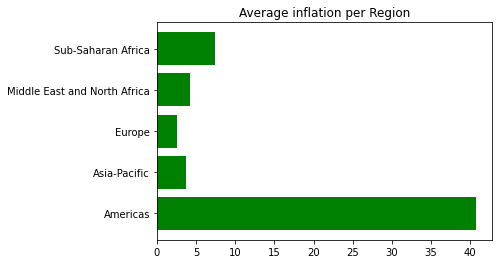

In [50]:
#Graphs

plt.barh(region_.index, region_['Inflation (%)'], color='g')
plt.title('Average inflation per Region')
plt.show()

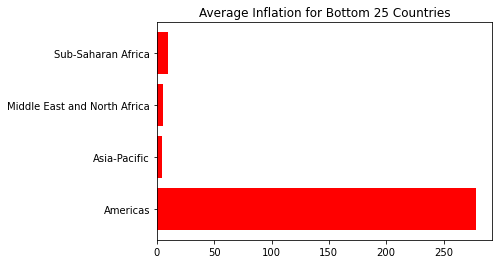

In [54]:
plt.barh(region_small.index, region_small['Inflation (%)'], color='r')
plt.title('Average Inflation for Bottom 25 Countries')
plt.show()

#Not great as the Americas must have outlying countries

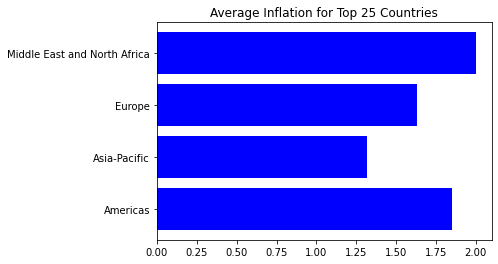

In [55]:
plt.barh(region_large.index, region_large['Inflation (%)'], color='blue')
plt.title('Average Inflation for Top 25 Countries')
plt.show()


In [59]:
data.index[169]
no_venezuela = data.drop(data.index[169])

#getting rid of Venezuela to see how this affects the inflation rate

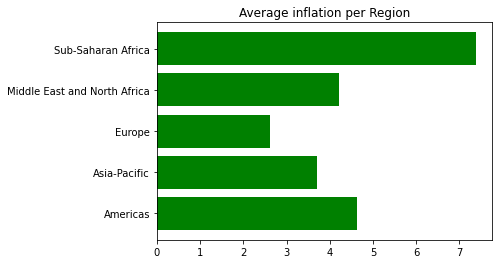

In [61]:
no_ven1 = no_venezuela.groupby('Region').mean()

plt.barh(no_ven1.index, no_ven1['Inflation (%)'], color='g')
plt.title('Average inflation per Region')
plt.show()

#Americas inflation rate changed a lot once Venezuela was removed from the Region.
#Average inflation not as bad as initially perceived due to outlying country

In [66]:
no_ven1[no_ven1.columns[15:24]]

,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%)
Region,,,,,,,,,
Americas,52.413793,6.020690,28.217241,26.482759,22.313793,28.741379,2.348276,2.417241,4.627586
Asia-Pacific,44.250000,4.957500,24.397500,22.482500,17.245000,28.795000,4.502500,4.282500,3.707500
Europe,63.255814,2.197674,31.506977,19.553488,34.020930,41.758140,3.453488,2.451163,2.604651
Middle East and North Africa,52.857143,5.150000,18.035714,15.607143,13.371429,35.214286,1.835714,2.742857,4.221429
Sub-Saharan Africa,39.782609,9.204348,32.891304,29.934783,17.652174,26.710870,3.497826,3.723913,7.378261


In [67]:
region_[region_.columns[15:24]]

#Comparing this data with the line above to see the differnces with the Americas after Venezuela is gone.

,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%)
Region,,,,,,,,,
Americas,51.000000,6.153333,28.410000,26.733333,22.066667,29.030000,1.803333,2.076667,40.723333
Asia-Pacific,44.250000,4.957500,24.397500,22.482500,17.245000,28.795000,4.502500,4.282500,3.707500
Europe,63.255814,2.197674,31.506977,19.553488,34.020930,41.758140,3.453488,2.451163,2.604651
Middle East and North Africa,52.857143,5.150000,18.035714,15.607143,13.371429,35.214286,1.835714,2.742857,4.221429
Sub-Saharan Africa,39.782609,9.204348,32.891304,29.934783,17.652174,26.710870,3.497826,3.723913,7.378261


In [68]:
from sklearn.cluster import KMeans

In [69]:
Country_Group = data.groupby('Country').mean()

wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(3,13):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(Country_Group)
    wcss.append(kmeans.inertia_)

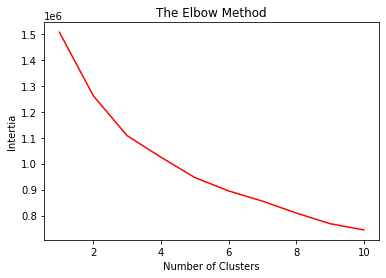

In [77]:
plt.plot(range(1,11), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [79]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

#Optimal elbow to use for k-means is 3. 

3

In [80]:
k_means = KMeans(
init="random",
n_clusters=3,
n_init=1,
max_iter=5,
random_state=42
)

#number of clusters is 3 because of the previous output from the elbow method

In [82]:
y_kmeans = k_means.fit_predict(Country_Group)
Country_Group['y_kmeans'] = y_kmeans

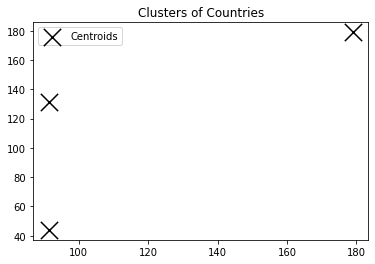

In [83]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'black', marker='x', label = 'Centroids')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

In [84]:
cluster_results = Country_Group.groupby('y_kmeans').mean()
cluster_results

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 plus one,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one
y_kmeans,,,,,,,,,,,,,,,,,,,,,
0,91.250000,131.079545,26.159091,53.785227,39.602273,35.582955,30.070455,79.092045,73.065909,54.077273,...,61.510964,32.027935,60.758574,28.401196,80.833961,61.399445,6.130188,0.499114,88.693367,23.268085
1,91.488095,43.940476,13.857143,69.695238,68.733333,57.397619,55.489286,76.285714,58.730952,80.738095,...,76.381870,45.087141,71.972276,37.931774,85.742857,72.525480,5.502503,1.064339,91.888403,22.855076
2,179.000000,179.000000,32.000000,25.900000,7.600000,13.100000,7.900000,74.700000,58.100000,17.600000,...,66.585027,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135


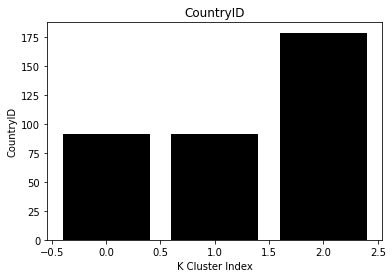

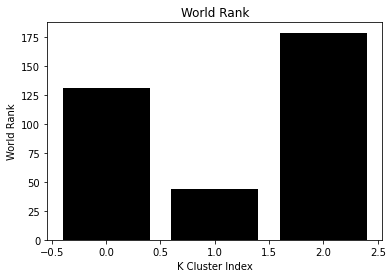

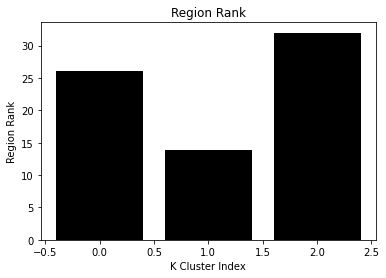

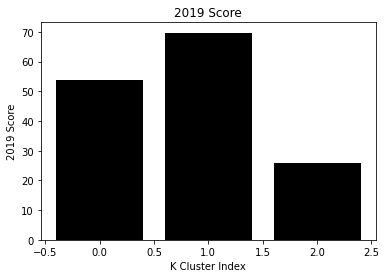

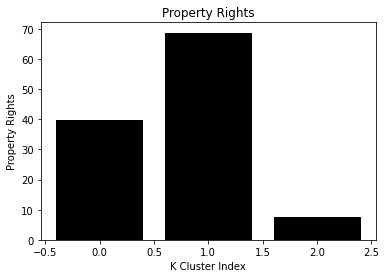

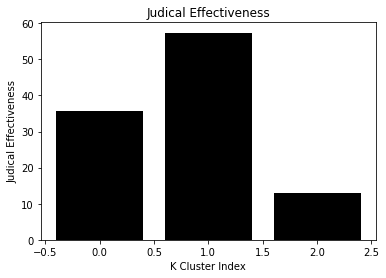

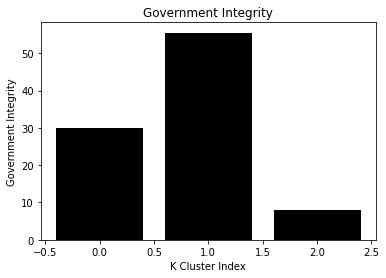

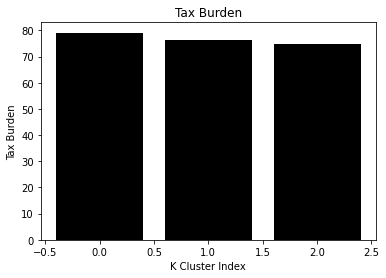

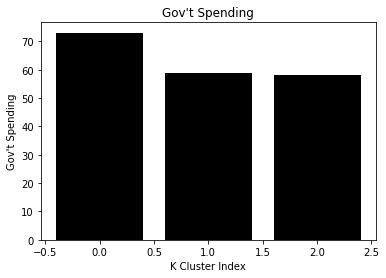

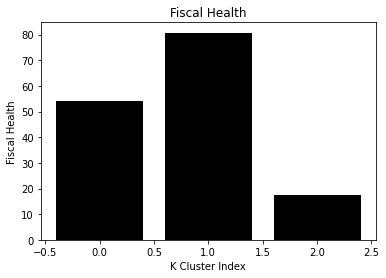

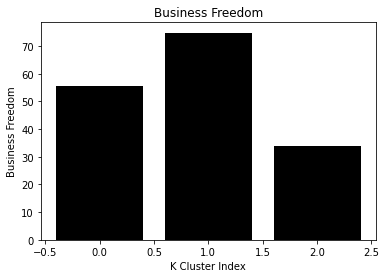

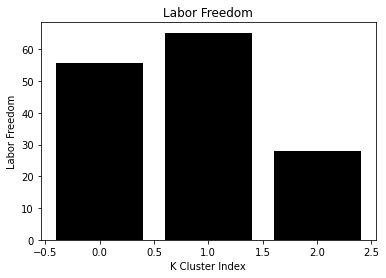

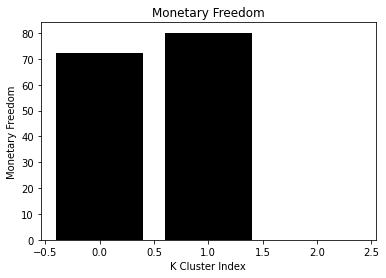

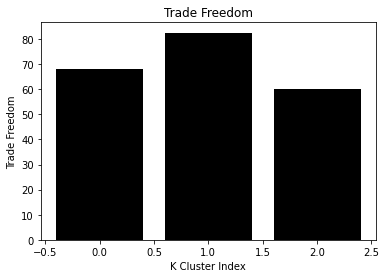

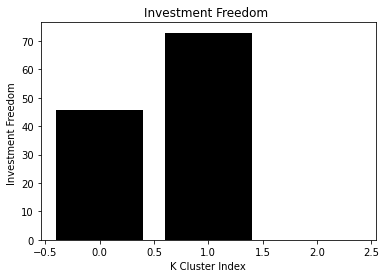

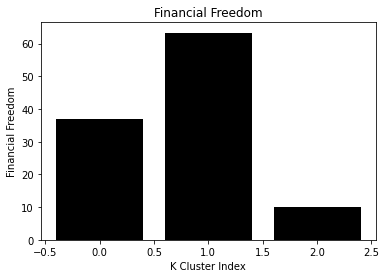

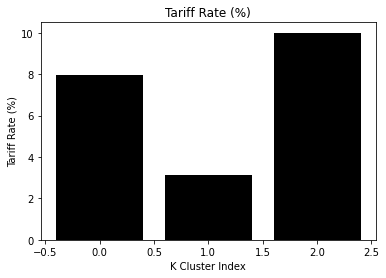

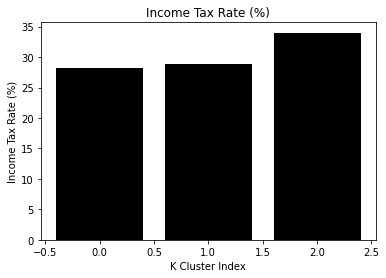

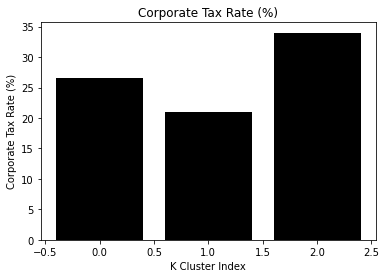

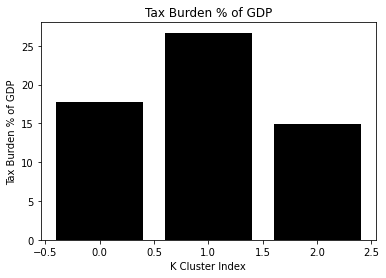

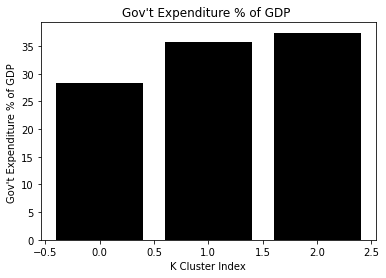

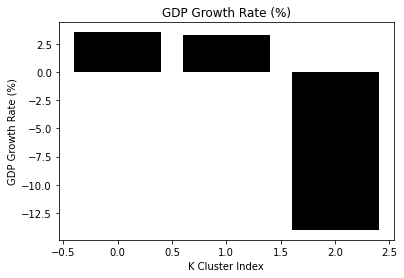

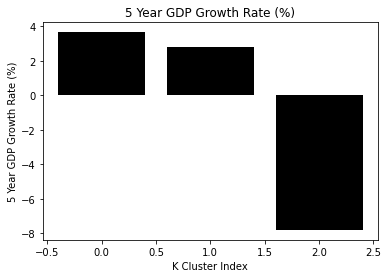

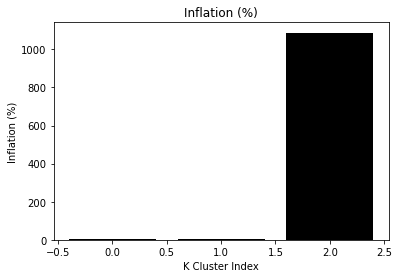

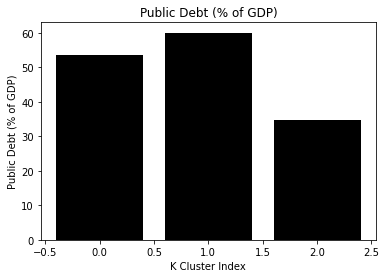

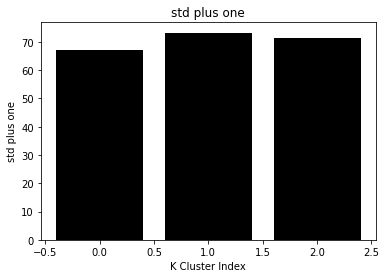

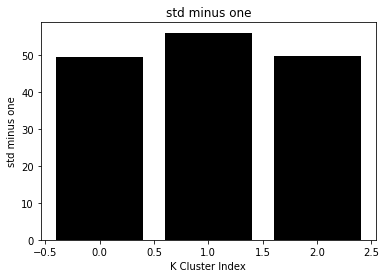

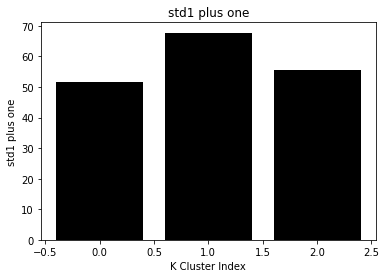

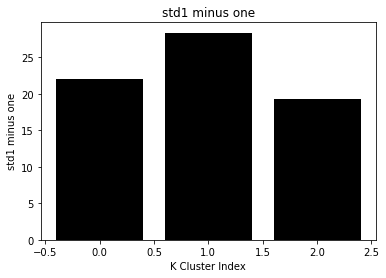

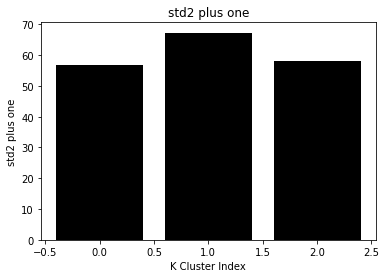

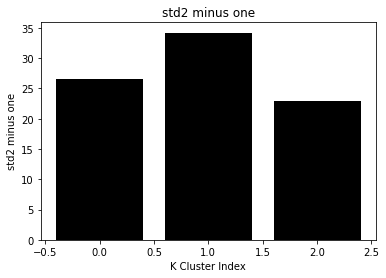

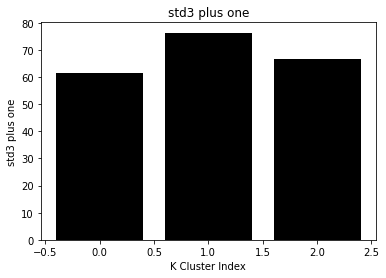

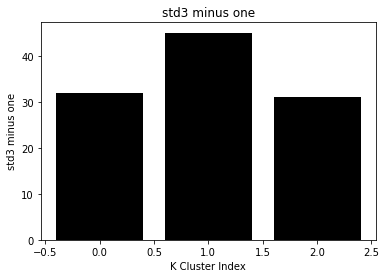

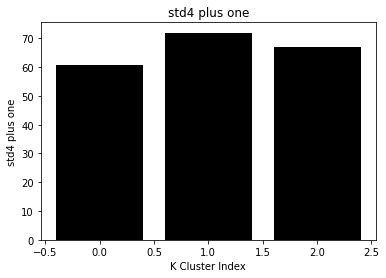

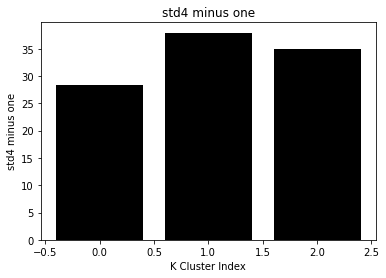

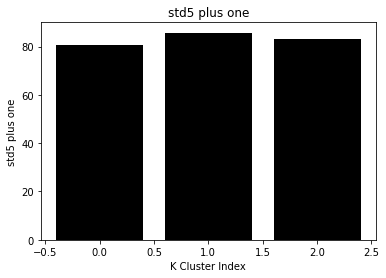

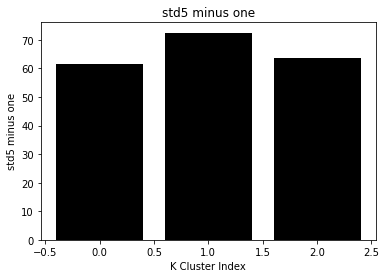

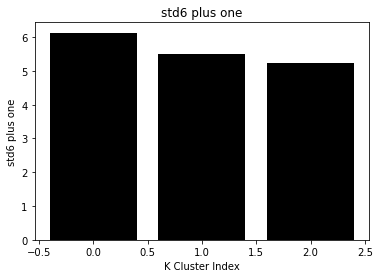

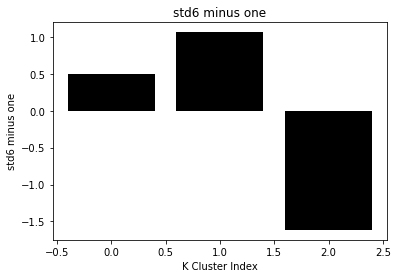

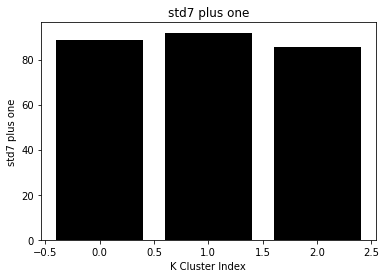

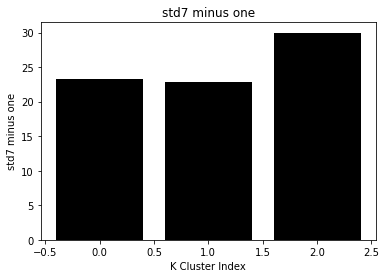

In [85]:
for col in cluster_results.columns:
    plt.bar(cluster_results.index,cluster_results[col], color='k')
    plt.title(col)
    plt.xlabel('K Cluster Index')
    plt.ylabel(col)
    plt.show()

In [86]:
#From above, cluster 1 and cluster 2 on the index are the most interesting clusters for the majority of the columns.

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [91]:
cluster_0 = Country_Group[Country_Group['y_kmeans'] == 0]
cluster_1 = Country_Group[Country_Group['y_kmeans'] == 1]
cluster_2 = Country_Group[Country_Group['y_kmeans'] == 2]

In [94]:
cluster_0.sort_values('2019 Score', ascending=False)[:25]

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Bahamas,10,76.0,15.0,62.9,42.2,46.9,43.7,97.3,86.8,65.7,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
Guatemala,65,77.0,16.0,62.6,40.3,32.3,26.4,79.2,95.6,96.2,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
CÙte d'Ivoire,40,78.0,5.0,62.4,40.9,47.8,38.1,77.5,83.9,74.3,...,27.214281,53.030523,26.534694,76.498980,55.809715,6.565108,0.430544,88.057856,28.398666,0
Paraguay,129,85.0,18.0,61.8,39.5,30.0,25.5,96.3,78.9,96.3,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
El Salvador,51,84.0,17.0,61.8,37.6,29.1,23.4,78.1,86.3,81.9,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
Dominican Republic,48,89.0,19.0,61.0,50.6,18.1,23.2,84.6,90.3,89.9,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
Saudi Arabia,142,91.0,9.0,60.7,55.0,62.7,49.8,99.8,57.5,19.4,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,0
Honduras,70,93.0,20.0,60.2,43.4,31.0,25.3,82.8,78.2,95.9,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,0
Tanzania,162,94.0,7.0,60.2,35.4,41.4,33.2,80.5,90.3,85.2,...,27.214281,53.030523,26.534694,76.498980,55.809715,6.565108,0.430544,88.057856,28.398666,0


In [92]:
cluster_1.sort_values('2019 Score', ascending=False)[:25]

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Hong Kong SAR,71,1.0,1.0,90.2,93.3,75.3,83.8,93.1,90.3,100.0,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Singapore,147,2.0,2.0,89.4,97.4,92.4,95.1,90.4,90.7,80.0,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
New Zealand,120,3.0,3.0,84.4,95.0,83.5,96.7,71.0,50.4,98.6,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Switzerland,158,4.0,1.0,81.9,85.3,82.0,88.0,70.5,64.8,96.3,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Australia,7,5.0,4.0,80.9,79.1,86.5,79.9,62.8,60.1,86.2,...,36.975762,65.839112,22.660888,85.475669,65.939331,6.727819,2.277181,88.050871,7.494129,1
Ireland,78,6.0,2.0,80.5,85.8,68.4,78.0,76.3,77.4,89.0,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
United Kingdom,174,7.0,3.0,78.9,92.3,85.9,83.8,64.7,48.2,68.6,...,56.544206,78.487506,48.024122,87.677559,80.968952,5.232914,1.674062,94.391742,27.324537,1
Canada,29,8.0,1.0,77.7,87.0,69.4,84.6,76.8,51.3,83.1,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.221690,-1.615023,85.763865,29.976135,1
United Arab Emirates,173,9.0,1.0,77.6,81.8,87.1,78.8,99.2,68.8,88.9,...,38.902552,71.432797,34.281488,85.857944,68.542056,3.865344,-0.193915,100.353492,22.646508,1


In [93]:
cluster_2.sort_values('2019 Score', ascending=False)[:25]

#not happy with how this clustered

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,std3 minus one,std4 plus one,std4 minus one,std5 plus one,std5 minus one,std6 plus one,std6 minus one,std7 plus one,std7 minus one,y_kmeans
Country,,,,,,,,,,,,,,,,,,,,,
Venezuela,179,179.0,32.0,25.9,7.6,13.1,7.9,74.7,58.1,17.6,...,30.994973,67.049492,34.950508,82.953877,63.766123,5.22169,-1.615023,85.763865,29.976135,2


In [95]:
segmented_columns = Country_Group.columns[2:25]
segmented_columns

Index(['Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ',
       'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [97]:
for seg in segmented_columns:
    print('Values:', seg, 'equals',data.iloc[data[seg].argmax()]['Country'])

Values: Region Rank equals Eritrea
Values: 2019 Score equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Labor Freedom equals Singapore
Values: Monetary Freedom equals Bulgaria
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Financial Freedom equals Australia
Values: Tariff Rate (%) equals Bahamas
Values: Income Tax Rate (%) equals Chad
Values: Corporate Tax Rate (%) equals Comoros
Values: Tax Burden % of GDP equals Lesotho
Values: Gov't Expenditure % of GDP  equals Timor-Leste
Values: GDP Growth Rate (%) equals Ethiopia
Values: 5 Year GDP Growth Rate (%) equals Ethiopia
Values: Inflation (%) equals Venezuela
Values: Public Debt (% of GDP) equals Japan


## Redoing the clustering

In [98]:
#redoing the clustering because some of the output can be misleading. higher values for some columns aren't actually
#good like they are with the others. E.g.: high inflation is not a good sign, high labor freedom is a good sign, etc.

#Will only include columns that are the main economic freedoms and can be interpreted the same

In [153]:
data1 = data[['2019 Score','Country','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','Tax Burden','Gov\'t Spending','Fiscal Health']]

In [154]:
Final_data = data1.groupby('Country').mean()

In [155]:
Final_data

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
Country,,,,,,,,,,,,,
Afghanistan,51.5,49.2,19.6,29.6,25.2,60.4,66.0,10.0,76.7,10.0,91.7,80.3,99.3
Albania,66.5,69.3,54.8,30.6,40.4,52.7,87.8,70.0,81.5,70.0,86.3,73.9,80.6
Algeria,46.2,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,76.4,48.7,18.7
Angola,50.6,55.7,35.9,26.6,20.5,58.8,61.2,30.0,55.4,40.0,83.9,80.7,58.2
Argentina,52.2,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,69.3,49.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,52.4,65.9,36.4,51.9,58.8,64.4,65.0,75.0,40.0,97.3,54.1,15.3
Venezuela,25.9,33.9,7.6,13.1,7.9,28.0,60.0,0.0,0.0,10.0,74.7,58.1,17.6
Vietnam,55.3,63.5,49.8,40.3,34.0,62.8,79.2,30.0,68.9,40.0,79.7,74.1,40.7


In [156]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(3,13):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(Final_data)
    wcss.append(kmeans.inertia_)

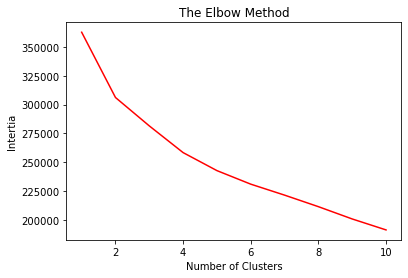

In [157]:
plt.plot(range(1,11), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [158]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")


kl.elbow

#most optinal elbow to use for the new dataset is 4

4

In [159]:
k_means = KMeans(
init="random",
n_clusters=4,
n_init=1,
max_iter=5,
random_state=42
)

In [160]:
y_kmeans = k_means.fit_predict(Final_data)
Final_data['y_kmeans'] = y_kmeans

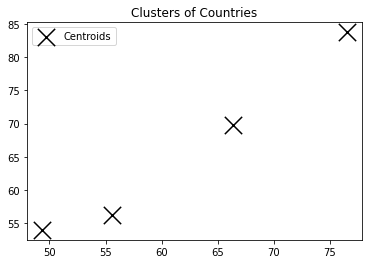

In [161]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'black', marker='x', label = 'Centroids')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

In [162]:
cluster_results = Final_data.groupby('y_kmeans').mean()
cluster_results

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health
y_kmeans,,,,,,,,,,,,,
0,55.581633,55.044898,38.869388,36.004082,30.134694,57.155102,66.608163,40.918367,72.342857,32.448980,79.163265,78.144898,80.095918
1,66.676786,69.626786,60.021429,48.069643,42.507143,61.200000,80.539286,70.625000,78.826786,59.285714,79.921429,66.112500,83.369643
2,51.604762,57.702381,42.473810,36.638095,32.095238,57.042857,70.364286,49.285714,71.233333,41.666667,79.940476,63.169048,17.559524
3,76.484615,83.738462,85.250000,75.803846,81.161538,67.896154,86.523077,80.961538,82.392308,74.230769,66.565385,47.569231,85.673077


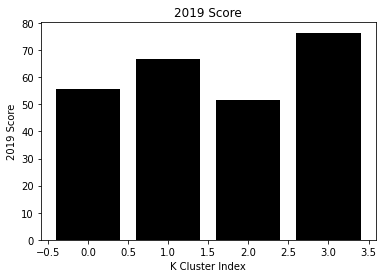

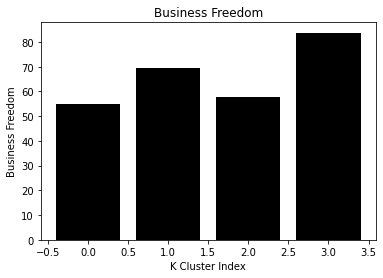

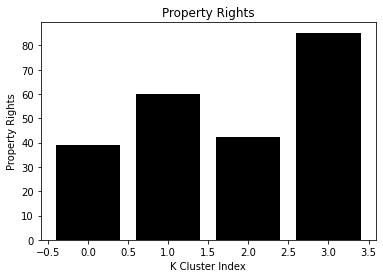

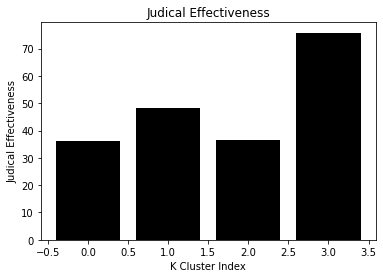

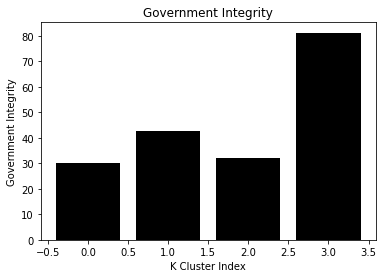

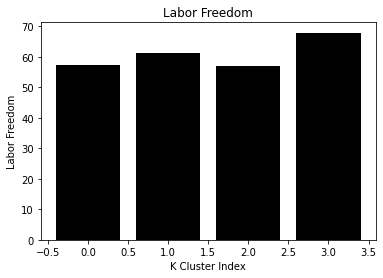

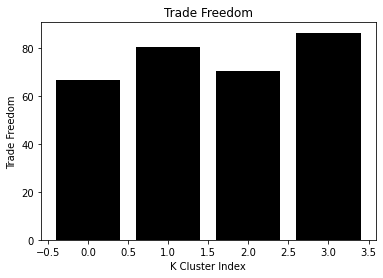

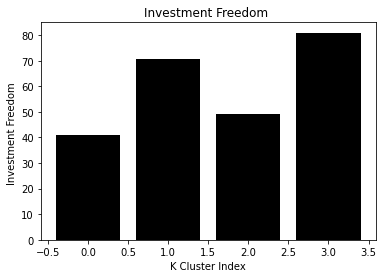

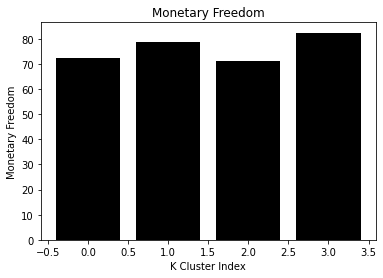

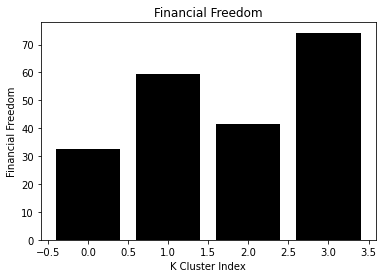

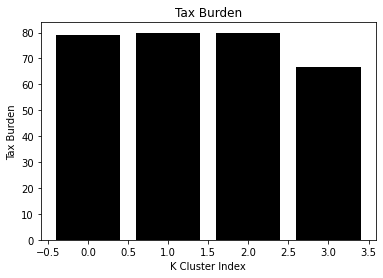

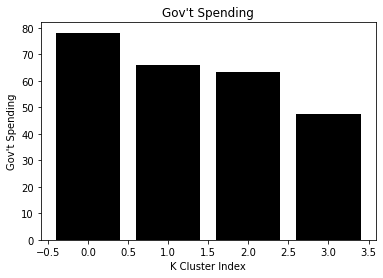

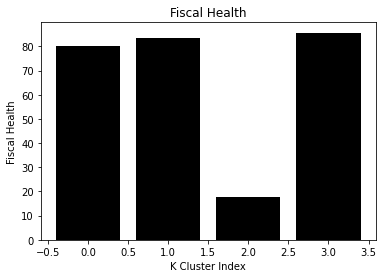

In [163]:
for col in cluster_results.columns:
    plt.bar(cluster_results.index,cluster_results[col], color='k')
    plt.title(col)
    plt.xlabel('K Cluster Index')
    plt.ylabel(col)
    plt.show()

In [164]:
cluster_3 = Final_data[Final_data['y_kmeans'] == 3]
cluster_2 = Final_data[Final_data['y_kmeans'] == 2]


#cluster 3 and cluster 2 are the only ones of interest

In [189]:
cluster_2

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
Country,,,,,,,,,,,,,,
Algeria,46.2,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,76.4,48.7,18.7,2
Argentina,52.2,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,69.3,49.5,33.0,2
Bahrain,66.4,71.4,63.5,50.7,53.6,71.1,83.8,75.0,81.6,80.0,99.7,62.7,3.7,2
Belize,55.4,61.8,41.7,46.9,27.2,54.8,64.0,55.0,78.7,50.0,79.9,65.9,39.1,2
Benin,55.3,62.4,37.2,32.8,28.1,53.8,61.8,70.0,86.4,50.0,69.3,83.4,27.9,2
Bolivia,42.3,58.8,20.5,12.3,19.7,52.9,70.4,15.0,68.8,40.0,82.4,49.3,17.6,2
Brazil,51.9,57.9,57.3,51.7,28.1,51.9,69.0,50.0,75.5,50.0,70.5,55.2,5.9,2
Brunei Darussalam,65.1,80.2,64.0,56.0,43.7,90.8,84.0,65.0,76.5,50.0,90.7,59.9,20.0,2
Burundi,48.9,50.3,20.6,31.0,26.2,67.5,68.2,50.0,62.2,30.0,74.0,83.3,23.3,2


In [191]:
cluster_3

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
Country,,,,,,,,,,,,,,
Australia,80.9,88.3,79.1,86.5,79.9,84.1,87.6,80.0,86.6,90.0,62.8,60.1,86.2,3
Austria,72.0,74.9,84.2,71.3,77.4,68.7,86.0,90.0,81.5,70.0,50.5,24.5,85.5,3
Belgium,67.3,78.1,81.3,61.6,72.5,61.0,86.0,85.0,76.1,70.0,47.1,15.2,73.4,3
Canada,77.7,81.9,87.0,69.4,84.6,73.7,86.8,80.0,77.2,80.0,76.8,51.3,83.1,3
Denmark,76.7,90.7,86.2,77.8,85.8,86.4,86.0,90.0,84.1,80.0,42.0,14.4,96.7,3
Estonia,76.6,75.3,81.5,76.0,73.1,57.2,86.0,90.0,79.6,70.0,79.9,51.1,99.8,3
Finland,74.9,89.4,89.6,81.2,92.5,50.3,86.0,85.0,84.8,80.0,66.8,7.2,86.4,3
France,63.8,81.2,82.5,66.1,67.9,45.2,81.0,75.0,79.1,70.0,48.4,3.9,64.9,3
Germany,73.5,83.3,79.9,75.4,81.3,52.8,86.0,80.0,77.9,70.0,60.8,42.3,91.8,3


In [192]:
Final_data

,2019 Score,Business Freedom,Property Rights,Judical Effectiveness,Government Integrity,Labor Freedom,Trade Freedom,Investment Freedom,Monetary Freedom,Financial Freedom,Tax Burden,Gov't Spending,Fiscal Health,y_kmeans
Country,,,,,,,,,,,,,,
Afghanistan,51.5,49.2,19.6,29.6,25.2,60.4,66.0,10.0,76.7,10.0,91.7,80.3,99.3,0
Albania,66.5,69.3,54.8,30.6,40.4,52.7,87.8,70.0,81.5,70.0,86.3,73.9,80.6,1
Algeria,46.2,61.6,31.6,36.2,28.9,49.9,67.4,30.0,74.9,30.0,76.4,48.7,18.7,2
Angola,50.6,55.7,35.9,26.6,20.5,58.8,61.2,30.0,55.4,40.0,83.9,80.7,58.2,0
Argentina,52.2,56.4,47.8,44.5,33.5,46.9,70.0,55.0,60.2,60.0,69.3,49.5,33.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,56.4,52.4,65.9,36.4,51.9,58.8,64.4,65.0,75.0,40.0,97.3,54.1,15.3,2
Venezuela,25.9,33.9,7.6,13.1,7.9,28.0,60.0,0.0,0.0,10.0,74.7,58.1,17.6,2
Vietnam,55.3,63.5,49.8,40.3,34.0,62.8,79.2,30.0,68.9,40.0,79.7,74.1,40.7,2


In [193]:
data2 = data[['2019 Score','Country','Region','Business Freedom','Property Rights','Judical Effectiveness','Government Integrity', 'Labor Freedom','Trade Freedom','Investment Freedom ','Monetary Freedom','Financial Freedom','Tax Burden',"Gov't Spending",'Fiscal Health']]
seg2_columns = Final_data.iloc[:, np.r_[0:13]]

In [194]:
for seg in seg2_columns:
    print('Values:',seg, 'equals', data2.iloc[data2[seg].argmax()]['Country'])

Values: 2019 Score equals Hong Kong SAR
Values: Business Freedom equals Hong Kong SAR
Values: Property Rights equals Singapore
Values: Judical Effectiveness equals Singapore
Values: Government Integrity equals New Zealand
Values: Labor Freedom equals Singapore
Values: Trade Freedom equals Hong Kong SAR
Values: Investment Freedom  equals Luxembourg
Values: Monetary Freedom equals Bulgaria
Values: Financial Freedom equals Australia
Values: Tax Burden equals Saudi Arabia
Values: Gov't Spending equals Sudan
Values: Fiscal Health equals Hong Kong SAR


In [195]:
for seg in seg2_columns:
    print('Values:',seg, 'equals', data2.iloc[data2[seg].argmax()]['Region'])

Values: 2019 Score equals Asia-Pacific
Values: Business Freedom equals Asia-Pacific
Values: Property Rights equals Asia-Pacific
Values: Judical Effectiveness equals Asia-Pacific
Values: Government Integrity equals Asia-Pacific
Values: Labor Freedom equals Asia-Pacific
Values: Trade Freedom equals Asia-Pacific
Values: Investment Freedom  equals Europe
Values: Monetary Freedom equals Europe
Values: Financial Freedom equals Asia-Pacific
Values: Tax Burden equals Middle East and North Africa
Values: Gov't Spending equals Sub-Saharan Africa
Values: Fiscal Health equals Asia-Pacific


In [196]:
for seg in seg2_columns:
    print('Values:',seg, 'equals', data2.iloc[data2[seg].argmin()]['Country'])

Values: 2019 Score equals Venezuela
Values: Business Freedom equals Eritrea
Values: Property Rights equals Venezuela
Values: Judical Effectiveness equals Bolivia
Values: Government Integrity equals Venezuela
Values: Labor Freedom equals Turkmenistan
Values: Trade Freedom equals Sudan
Values: Investment Freedom  equals Eritrea
Values: Monetary Freedom equals Venezuela
Values: Financial Freedom equals Afghanistan
Values: Tax Burden equals Denmark
Values: Gov't Spending equals Timor-Leste
Values: Fiscal Health equals Congo, Republic of


In [197]:
for seg in seg2_columns:
    print('Values:',seg, 'equals', data2.iloc[data2[seg].argmin()]['Region'])

Values: 2019 Score equals Americas
Values: Business Freedom equals Sub-Saharan Africa
Values: Property Rights equals Americas
Values: Judical Effectiveness equals Americas
Values: Government Integrity equals Americas
Values: Labor Freedom equals Asia-Pacific
Values: Trade Freedom equals Sub-Saharan Africa
Values: Investment Freedom  equals Sub-Saharan Africa
Values: Monetary Freedom equals Americas
Values: Financial Freedom equals Asia-Pacific
Values: Tax Burden equals Europe
Values: Gov't Spending equals Asia-Pacific
Values: Fiscal Health equals Sub-Saharan Africa


In [198]:
for col in data2.columns:
    print('feature:',col, '| top country:', data2.iloc[data2[seg].argmax()]['Country'])

feature: 2019 Score | top country: Hong Kong SAR
feature: Country | top country: Hong Kong SAR
feature: Region | top country: Hong Kong SAR
feature: Business Freedom | top country: Hong Kong SAR
feature: Property Rights | top country: Hong Kong SAR
feature: Judical Effectiveness | top country: Hong Kong SAR
feature: Government Integrity | top country: Hong Kong SAR
feature: Labor Freedom | top country: Hong Kong SAR
feature: Trade Freedom | top country: Hong Kong SAR
feature: Investment Freedom  | top country: Hong Kong SAR
feature: Monetary Freedom | top country: Hong Kong SAR
feature: Financial Freedom | top country: Hong Kong SAR
feature: Tax Burden | top country: Hong Kong SAR
feature: Gov't Spending | top country: Hong Kong SAR
feature: Fiscal Health | top country: Hong Kong SAR


In [199]:
for col in data2.columns:
    print('feature:',col, '| bottom country:', data2.iloc[data2[seg].argmin()]['Country'])

feature: 2019 Score | bottom country: Congo, Republic of
feature: Country | bottom country: Congo, Republic of
feature: Region | bottom country: Congo, Republic of
feature: Business Freedom | bottom country: Congo, Republic of
feature: Property Rights | bottom country: Congo, Republic of
feature: Judical Effectiveness | bottom country: Congo, Republic of
feature: Government Integrity | bottom country: Congo, Republic of
feature: Labor Freedom | bottom country: Congo, Republic of
feature: Trade Freedom | bottom country: Congo, Republic of
feature: Investment Freedom  | bottom country: Congo, Republic of
feature: Monetary Freedom | bottom country: Congo, Republic of
feature: Financial Freedom | bottom country: Congo, Republic of
feature: Tax Burden | bottom country: Congo, Republic of
feature: Gov't Spending | bottom country: Congo, Republic of
feature: Fiscal Health | bottom country: Congo, Republic of


## Predictive Modeling with Data Subsets

In [201]:
#Which subset of economic freedoms (Rule of Law, Regulatory Efficiency, Open Markets, Government Size) is the best
#at determining 2019 score of economic freedom?

#Rule of Law
x = data2[['Property Rights','Judical Effectiveness','Government Integrity']]
y = data2[['2019 Score']]

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=42)

In [203]:
linear_model = LinearRegression()

In [204]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [205]:
y_pred = linear_model.predict(x_test)
len(y_pred)

139

In [206]:
y_pred

array([[54.88157811],
       [65.76870755],
       [55.94657564],
       [67.35962545],
       [49.5483719 ],
       [58.96657473],
       [62.71138612],
       [55.45489292],
       [83.6978566 ],
       [61.19068386],
       [56.70354498],
       [62.75333462],
       [65.61091018],
       [51.4553034 ],
       [47.93314879],
       [58.49397706],
       [53.50393888],
       [81.47774066],
       [58.44258536],
       [59.76641179],
       [77.90022176],
       [50.01451221],
       [49.56982311],
       [78.32033633],
       [60.31954559],
       [52.1319591 ],
       [60.88602862],
       [54.75760594],
       [53.1912443 ],
       [68.13034843],
       [59.1397139 ],
       [45.8273668 ],
       [64.0348283 ],
       [84.84184855],
       [54.07798151],
       [50.23354345],
       [58.55217385],
       [56.22058823],
       [49.86972703],
       [69.78379708],
       [52.61877249],
       [55.35482051],
       [52.36883357],
       [53.06805736],
       [40.82716295],
       [75

In [207]:
r2 = linear_model.score(x,y)

In [209]:
r2

#this subset is 77% accurate in determining 2019 score

0.7745741033598701

In [211]:
#Government Size
x1 = data2[['Tax Burden',"Gov't Spending",'Fiscal Health']]
y1 = data2[['2019 Score']]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.8, random_state=42)

In [212]:
linear_model01 = LinearRegression()
linear_model01.fit(x1_train,y1_train)

LinearRegression()

In [213]:
y_pred1 = linear_model01.predict(x1_test)

In [215]:
second_r2 = linear_model01.score(x1,y1)
second_r2

#terrible score, not great at determining 2019 score

0.2753177527134202

In [217]:
#Regulatory Efficiency
x2 = data2[['Business Freedom','Labor Freedom','Monetary Freedom']]
y2 = data2[['2019 Score']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.8, random_state=42)

In [218]:
linear_model02 = LinearRegression()
linear_model02.fit(x2_train,y2_train)

LinearRegression()

In [219]:
y_pred2 = linear_model02.predict(x2_test)

In [220]:
third_r2 = linear_model02.score(x2,y2)
third_r2

0.6866792492198395

In [222]:
#Open Markets
x3 = data2[['Trade Freedom','Investment Freedom ','Financial Freedom']]
y3 = data2[['2019 Score']]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.8, random_state=42)

In [224]:
linear_model03 = LinearRegression()
linear_model03.fit(x3_train,y3_train)

LinearRegression()

In [225]:
y_pred3 = linear_model03.predict(x3_test)

In [226]:
fourth_r2 = linear_model03.score(x3,y3)
fourth_r2

0.6982837563226505

<AxesSubplot:>

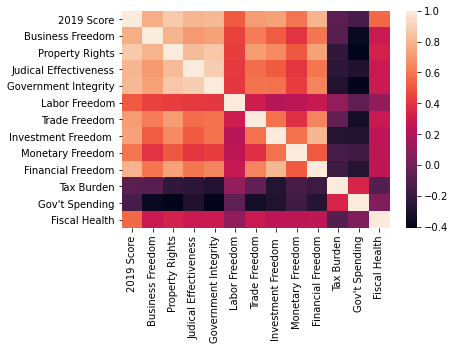

In [227]:
sns.heatmap(data2.corr())

## More Graphing

In [228]:
#Rule of Law is the best subset, using tiers from earlier, I will use them for graphing the frequency of region
#in each Rule of Market economic freedom

data3 = data[['Country','Region', '2019 tier', 'Property Rights tier','Gov Integrity tier','Judical Effectiveness tier']]

In [230]:
region_propB = data3[(data3['Property Rights tier'] == "bottom_tier")]['Region']
region_propM = data3[(data3['Property Rights tier'] == "middle_tier")]['Region']
region_propU = data3[(data3['Property Rights tier'] == "upper_tier")]['Region']

In [231]:
region_JudB = data3[(data3['Judical Effectiveness tier'] == "bottom_tier")]['Region']
region_JudM = data3[(data3['Judical Effectiveness tier'] == "middle_tier")]['Region']
region_JudU = data3[(data3['Judical Effectiveness tier'] == "upper_tier")]['Region']

In [232]:
region_IntB = data3[(data3['Gov Integrity tier'] == "bottom_tier")]['Region']
region_IntM = data3[(data3['Gov Integrity tier'] == "middle_tier")]['Region']
region_IntU = data3[(data3['Gov Integrity tier'] == "upper_tier")]['Region']

Text(0.5, 1.0, 'Frequency of Region for Upper tier Property Rights')

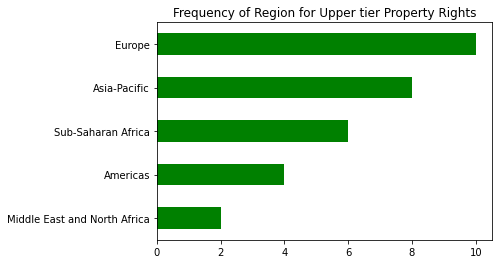

In [233]:
region_propU.value_counts().sort_values().plot(kind='barh',color='g')
plt.title('Frequency of Region for Upper tier Property Rights')

Text(0.5, 1.0, 'Frequency of Region for Upper tier Judicial Effectiveness')

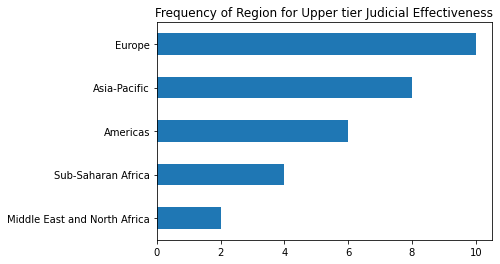

In [234]:
region_JudU.value_counts().sort_values().plot(kind='barh')
plt.title('Frequency of Region for Upper tier Judicial Effectiveness')

Text(0.5, 1.0, 'Frequency of Region for Upper tier Government Integrity')

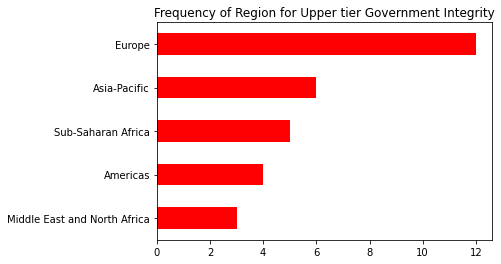

In [237]:
region_IntU.value_counts().sort_values().plot(kind='barh',color='red')
plt.title('Frequency of Region for Upper tier Government Integrity')

Text(0.5, 1.0, 'Frequency of Region for Bottom tier Property Rights')

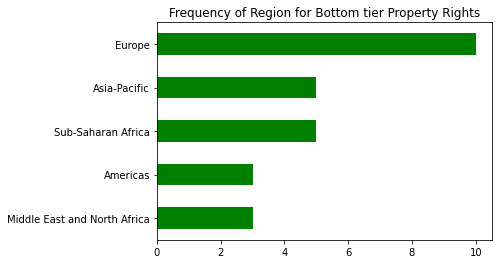

In [242]:
region_propB.value_counts().sort_values().plot(kind='barh', color='g')
plt.title('Frequency of Region for Bottom tier Property Rights')

Text(0.5, 1.0, 'Frequency of Region for Bottom tier Government Integrity')

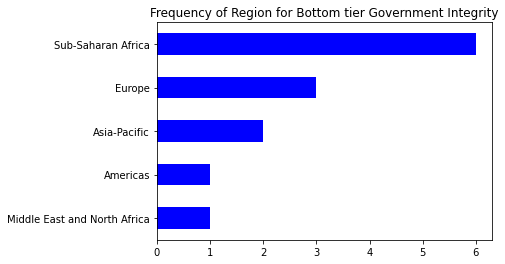

In [243]:
region_IntB.value_counts().sort_values().plot(kind='barh',color='blue')
plt.title('Frequency of Region for Bottom tier Government Integrity')

Text(0.5, 1.0, 'Frequency of Region for Bottom tier Judicial Effectiveness')

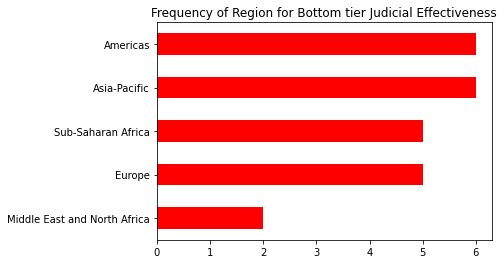

In [244]:
region_JudB.value_counts().sort_values().plot(kind='barh',color='red')
plt.title('Frequency of Region for Bottom tier Judicial Effectiveness')